### Compute side-reaction rate due to SEI growth
This code executes the method in the lesson to compute the side-reaction rate due to SEI-layer growth. The physical parameter values were taken from "Development of First Principles Capacity Fade model for Li-Ion cells", 2004, or were assumed using reasonable values if none were supplied in that paper. The final output is a graphical depiction of side-reaction rate, where large negative values are "bad" (very fast side reaction) and values near zero are "good" (slow side reaction).

In [2]:
% This is the function that computes the side-reaction rate at values of current "I",
% cell states of charge "Z", and temperature "Ambient".
function Js = computeJs(I,Z,Ambient)
  % Universal constants
  F = 96485;  % [C/mol] 
  R = 8.314; % [J/(mol-K)]
  F_RT = F/(R*(273.16+Ambient)); 

  % 100% and 0% SOC numbers for negative material
  theta_n_100 = 0.88;  % 100% SOC, Stoichiometric negative material [unitless]
  theta_n_0   = 0.03;  % 0% SOC, Stoichiometric negative material [unitless]
  Cmax_neg    = 30555; % [mol/m^3]

  % electrolyte physics
  Cs0_e = 1000; % [mol/m^3]


  % Geometry and Volume Fractions
  L_neg     = 88e-6;    % [m]
  eps_s_n   = 0.49;     % [unitless]
  Area_n    = 0.06;     % [m^2]
  Vol_n     = Area_n * L_neg * eps_s_n; % [m^3] 
  r_solid_n = 2e-6;    % [m]  
  a_s = 3*eps_s_n/r_solid_n; % [1/m]

  % kinetic and side reaction constants
  U_ref_s   = 0.4;      % [V]
  i_o_s     = 1.5e-6;   % [A/m^2]
  k_n       = 4.854e-6; % [A/m^2/(mol/m^3)^1.5]
  alpha_a_n = 0.5;      % [unitless]
  alpha_c_n = 0.5;      % [unitless]

  theta_n = theta_n_0 + Z*(theta_n_100-theta_n_0);
  U_n_ref = 0.7222+0.1387*theta_n+0.029*sqrt(theta_n)-0.0172./theta_n+ ...
            0.0019./theta_n.^1.5+0.2808*exp(0.9-15*theta_n)- ...
            0.7984*exp(0.4465*theta_n-0.4108);

  i_o = k_n.*(Cmax_neg - Cmax_neg.*theta_n).^alpha_a_n.* ...
        (Cmax_neg.*theta_n).^alpha_c_n.* ...
        (Cs0_e).^alpha_a_n; % [A/m^2]

  % With all the physical constants set up, compute the solution
  A = - i_o_s/F*exp(F_RT*(U_ref_s - U_n_ref)/2);
  B = -I ./ (2*a_s*L_neg*Area_n*i_o);
  C = F./(2*i_o);
  
  Js = (A.*B + A.*sqrt(B.*B+(1-2*C.*A)))./(1 - 2*C.*A); % [mol/m^2/s]
end

In [3]:
% Set up a grid of current and cell SOC points at which to compute Js
[I,Z] = meshgrid(0:0.2:45,0:0.02:1);
% Compute Js at those points
Js = computeJs(I,Z,25); % [mol/m^2/s]

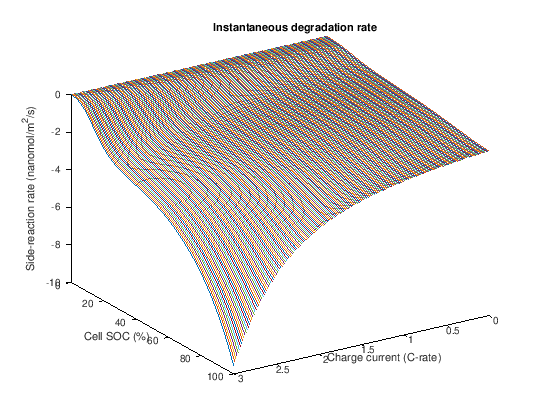

In [4]:
% Plot Js as a function of SOC and rate
plot3(3-I/15,100*Z,Js*1e9); 
xlabel('Charge current (C-rate)'); ylabel('Cell SOC (%)');
zlabel('Side-reaction rate (nanomol/m^2/s)');
title('Instantaneous degradation rate');
view([147.5,30]); % rotate plot for better visibility